Model: "Gaussiano"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 196, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,137 (793.50 KB)

 Trainable params: 203,137 (793.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 54973.9531 - mae: 165.6441 - val_loss: 373.0309 - val_mae: 15.4898
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 346.0489 - mae: 14.8020 - val_loss: 244.9779 - val_mae: 12.2961
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 224.5824 - mae: 12.1162 - val_loss: 228.1962 - val_mae: 11.8683
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 213.6463 - mae: 11.8189 - val_loss: 227.8063 - val_mae: 11.7967
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 200.5798 - mae: 11.4225 - val_loss: 284.3073 - val_mae: 13.6083
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 211.0197 - mae: 11.7624 - val_loss: 214.9916 - val_mae: 11.3909
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 182.8528 - mae: 10.9233 - val_loss: 200.0533 - val_mae: 11.0470
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 177.8146 - mae: 10.7213 - val_loss: 252.5818 - val_mae: 12.7855
Epoch 9/50
50

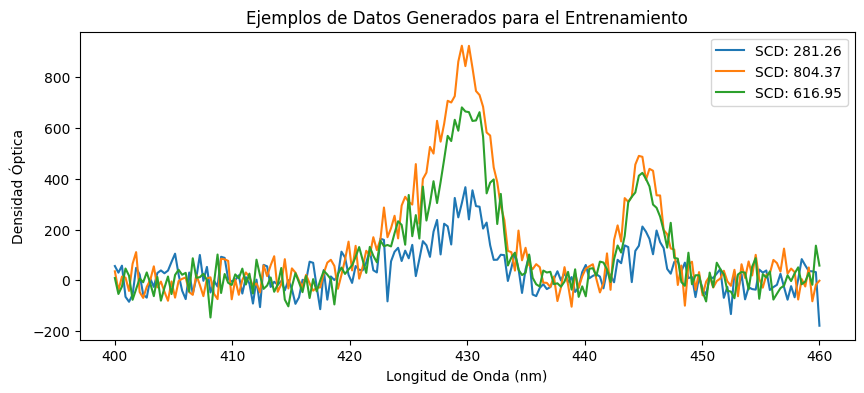

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#GENERAR LOS DATOS SINTÉTICOS

def seccion_eficaz_simulada(__n_gases, __longitudes_de_onda, __n_pixeles):

    secciones_eficaces_simuladas = np.zeros((__n_gases,__n_pixeles))

    #Parámetos de las gaussianas
    for i in range(__n_gases):
        amplitud_1 = np.random.uniform(0, 1)
        amplitud_2 = np.random.uniform(0, 1)
        amplitud_3 = np.random.uniform(0, 1)

        lambda_pico_1 = np.random.randint(410, 450)
        lambda_pico_2 = np.random.randint(410, 450)
        lambda_pico_3 = np.random.randint(410, 450)

        desviacion_estandar_1 = np.random.uniform(1.5, 3.1)
        desviacion_estandar_2 = np.random.uniform(1.5, 3.1)
        desviacion_estandar_3 = np.random.uniform(1.5, 3.1)

        #Definiendo las gaussianas
        gaussiana_1 = amplitud_1 * np.exp(-0.5 * ((__longitudes_de_onda - lambda_pico_1)/desviacion_estandar_1)**2)
        gaussiana_2 = amplitud_2 * np.exp(-0.5 * ((__longitudes_de_onda - lambda_pico_2)/desviacion_estandar_2)**2)
        gaussiana_3 = amplitud_3 * np.exp(-0.5 * ((__longitudes_de_onda - lambda_pico_3)/desviacion_estandar_3)**2)
        gaussiana_def = gaussiana_1 + gaussiana_2 + gaussiana_3

        secciones_eficaces_simuladas[i,:] = gaussiana_def

    return secciones_eficaces_simuladas

def generar_datos(__n_gases, __n_muestras, __n_pixeles):

    #Definiendo variables
    longitudes_de_onda    = np.linspace(400, 460, __n_pixeles)
    seccion_eficaz        = seccion_eficaz_simulada(__n_gases, longitudes_de_onda, __n_pixeles)
    Datos                 = np.zeros((__n_muestras, __n_pixeles))
    Slant_Colum_Densities = np.zeros((__n_gases, __n_muestras))

    #Generando los datos
    for i in range(__n_muestras):
        densidad_optica = np.zeros((__n_muestras, __n_pixeles))
        for j in range(__n_gases):
            slant_colum_density = np.random.uniform(0, 1000)
            Slant_Colum_Densities[j, i] = slant_colum_density
            densidad_optica[i,:] += seccion_eficaz[j, :] * slant_colum_density

        ruido = np.random.normal(0, 50, __n_pixeles)
        Datos[i, :] = densidad_optica[i] + ruido

    return Datos, Slant_Colum_Densities, longitudes_de_onda

#Definiendo más variables
n_muestras       = 2000
n_pixeles        = 200

#Gernerando y guardando los datos
Datos_raw, Real_Slant_Colum_Densities, longitudes_de_onda = generar_datos(n_muestras, n_pixeles)

#Formateando datos para la CNN
Datos_train = Datos_raw.reshape(n_muestras, n_pixeles, 1)

#CONSTRUCCIÓN DE LA RED NEURONAL

def construir_modelo():

    #Nombre
    __modelo = models.Sequential(name = "Gaussiano")

    #Dimensiones
    __modelo.add(layers.Input(shape = (n_pixeles, 1)))

    #Capas convolucionales
    __modelo.add(layers.Conv1D(filters = 32, kernel_size = 5, activation = 'relu'))
    __modelo.add(layers.MaxPooling1D(pool_size = 2))

    __modelo.add(layers.Conv1D(filters = 64, kernel_size = 3, activation = 'relu'))
    __modelo.add(layers.MaxPooling1D(pool_size = 2))

    __modelo.add(layers.Flatten())

    #Capas densas
    __modelo.add(layers.Dense(64, activation = 'relu'))
    __modelo.add(layers.Dense(1, activation = 'linear'))

    #Compilación
    __modelo.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    return __modelo

modelo = construir_modelo()
modelo.summary()

#ENTRENAMIENTO

historial = modelo.fit(
    Datos_train,
    Real_Slant_Colum_Densities,
    epochs           = 50,
    batch_size       = 32,
    validation_split = 0.2,
    verbose          = 1
)

#ERRORES
indices_prueba = np.random.randint(0, 2000, 3)

#Graficando ejemplos
plt.figure(figsize = (10, 4))

for i in indices_prueba:
    plt.plot(longitudes_de_onda, Datos_train[i], label = f"SCD: {Real_Slant_Colum_Densities[i]:.2f}")

plt.title("Ejemplos de Datos Generados para el Entrenamiento")
plt.xlabel("Longitud de Onda (nm)")
plt.ylabel("Densidad Óptica")
plt.legend()
plt.show()

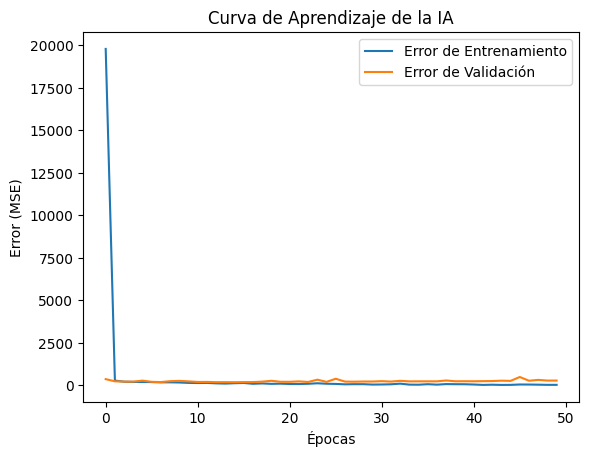

In [ ]:
#Graficando Errores y Progresión
plt.plot(historial.history['loss'], label = 'Error de Entrenamiento')
plt.plot(historial.history['val_loss'], label = 'Error de Validación')

plt.title("Curva de Aprendizaje de la IA")
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.legend()
plt.show()

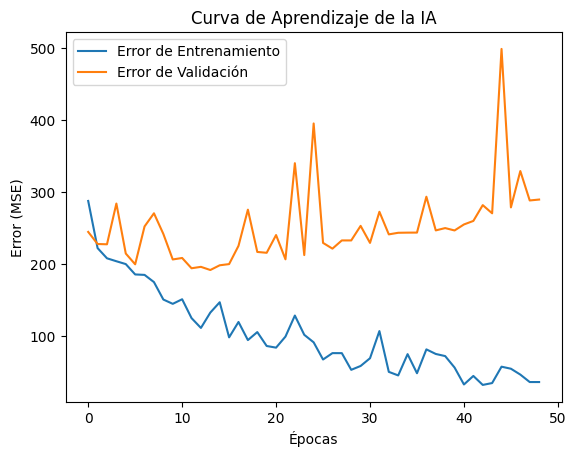

In [ ]:
plt.plot(historial.history['loss'][1:], label = 'Error de Entrenamiento')
plt.plot(historial.history['val_loss'][1:], label = 'Error de Validación')

plt.title("Curva de Aprendizaje de la IA")
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.legend()
plt.show()

In [ ]:
#VALIDACIÓN Y PREDICCIÓN

#Generando y formateando nuevos espectros para la predicción:
n_prediccion = 5

Datos_prediccion, Real_Slant_Colum_Densities_prediccion, _ = generar_datos(n_prediccion, n_pixeles)
Datos_prediccion_train = Datos_prediccion.reshape(n_prediccion, n_pixeles, 1)

predicciones = modelo.predict(Datos_prediccion_train)

print('\n --- TEST DE PREDICCION ---')
for i in range(n_prediccion):

    error_relativo = (abs(Real_Slant_Colum_Densities_prediccion[i] - predicciones[i][0]) / Real_Slant_Colum_Densities_prediccion[i]) * 100

    print(f'Muestra {i + 1}: ')
    print(f'    Real : {Real_Slant_Colum_Densities_prediccion[i]:.2f} ppm')
    print(f'    IA   : {predicciones[i][0]:.2f} ppm')
    print(f'    Error: {error_relativo:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

 --- TEST DE PREDICCION ---
Muestra 1: 
    Real : 852.30 ppm
    IA   : 845.90 ppm
    Error: 0.75%
Muestra 2: 
    Real : 666.91 ppm
    IA   : 644.27 ppm
    Error: 3.39%
Muestra 3: 
    Real : 272.42 ppm
    IA   : 298.46 ppm
    Error: 9.56%
Muestra 4: 
    Real : 341.69 ppm
    IA   : 329.25 ppm
    Error: 3.64%
Muestra 5: 
    Real : 952.11 ppm
    IA   : 950.27 ppm
    Error: 0.19%
